In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

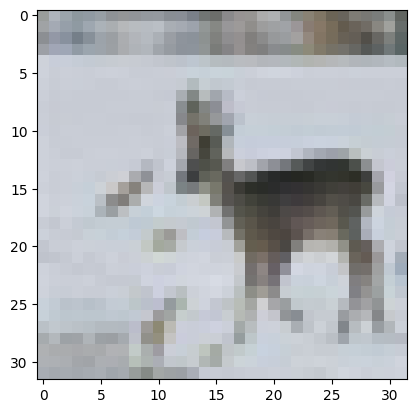

In [6]:
plt.imshow(X_train[20])

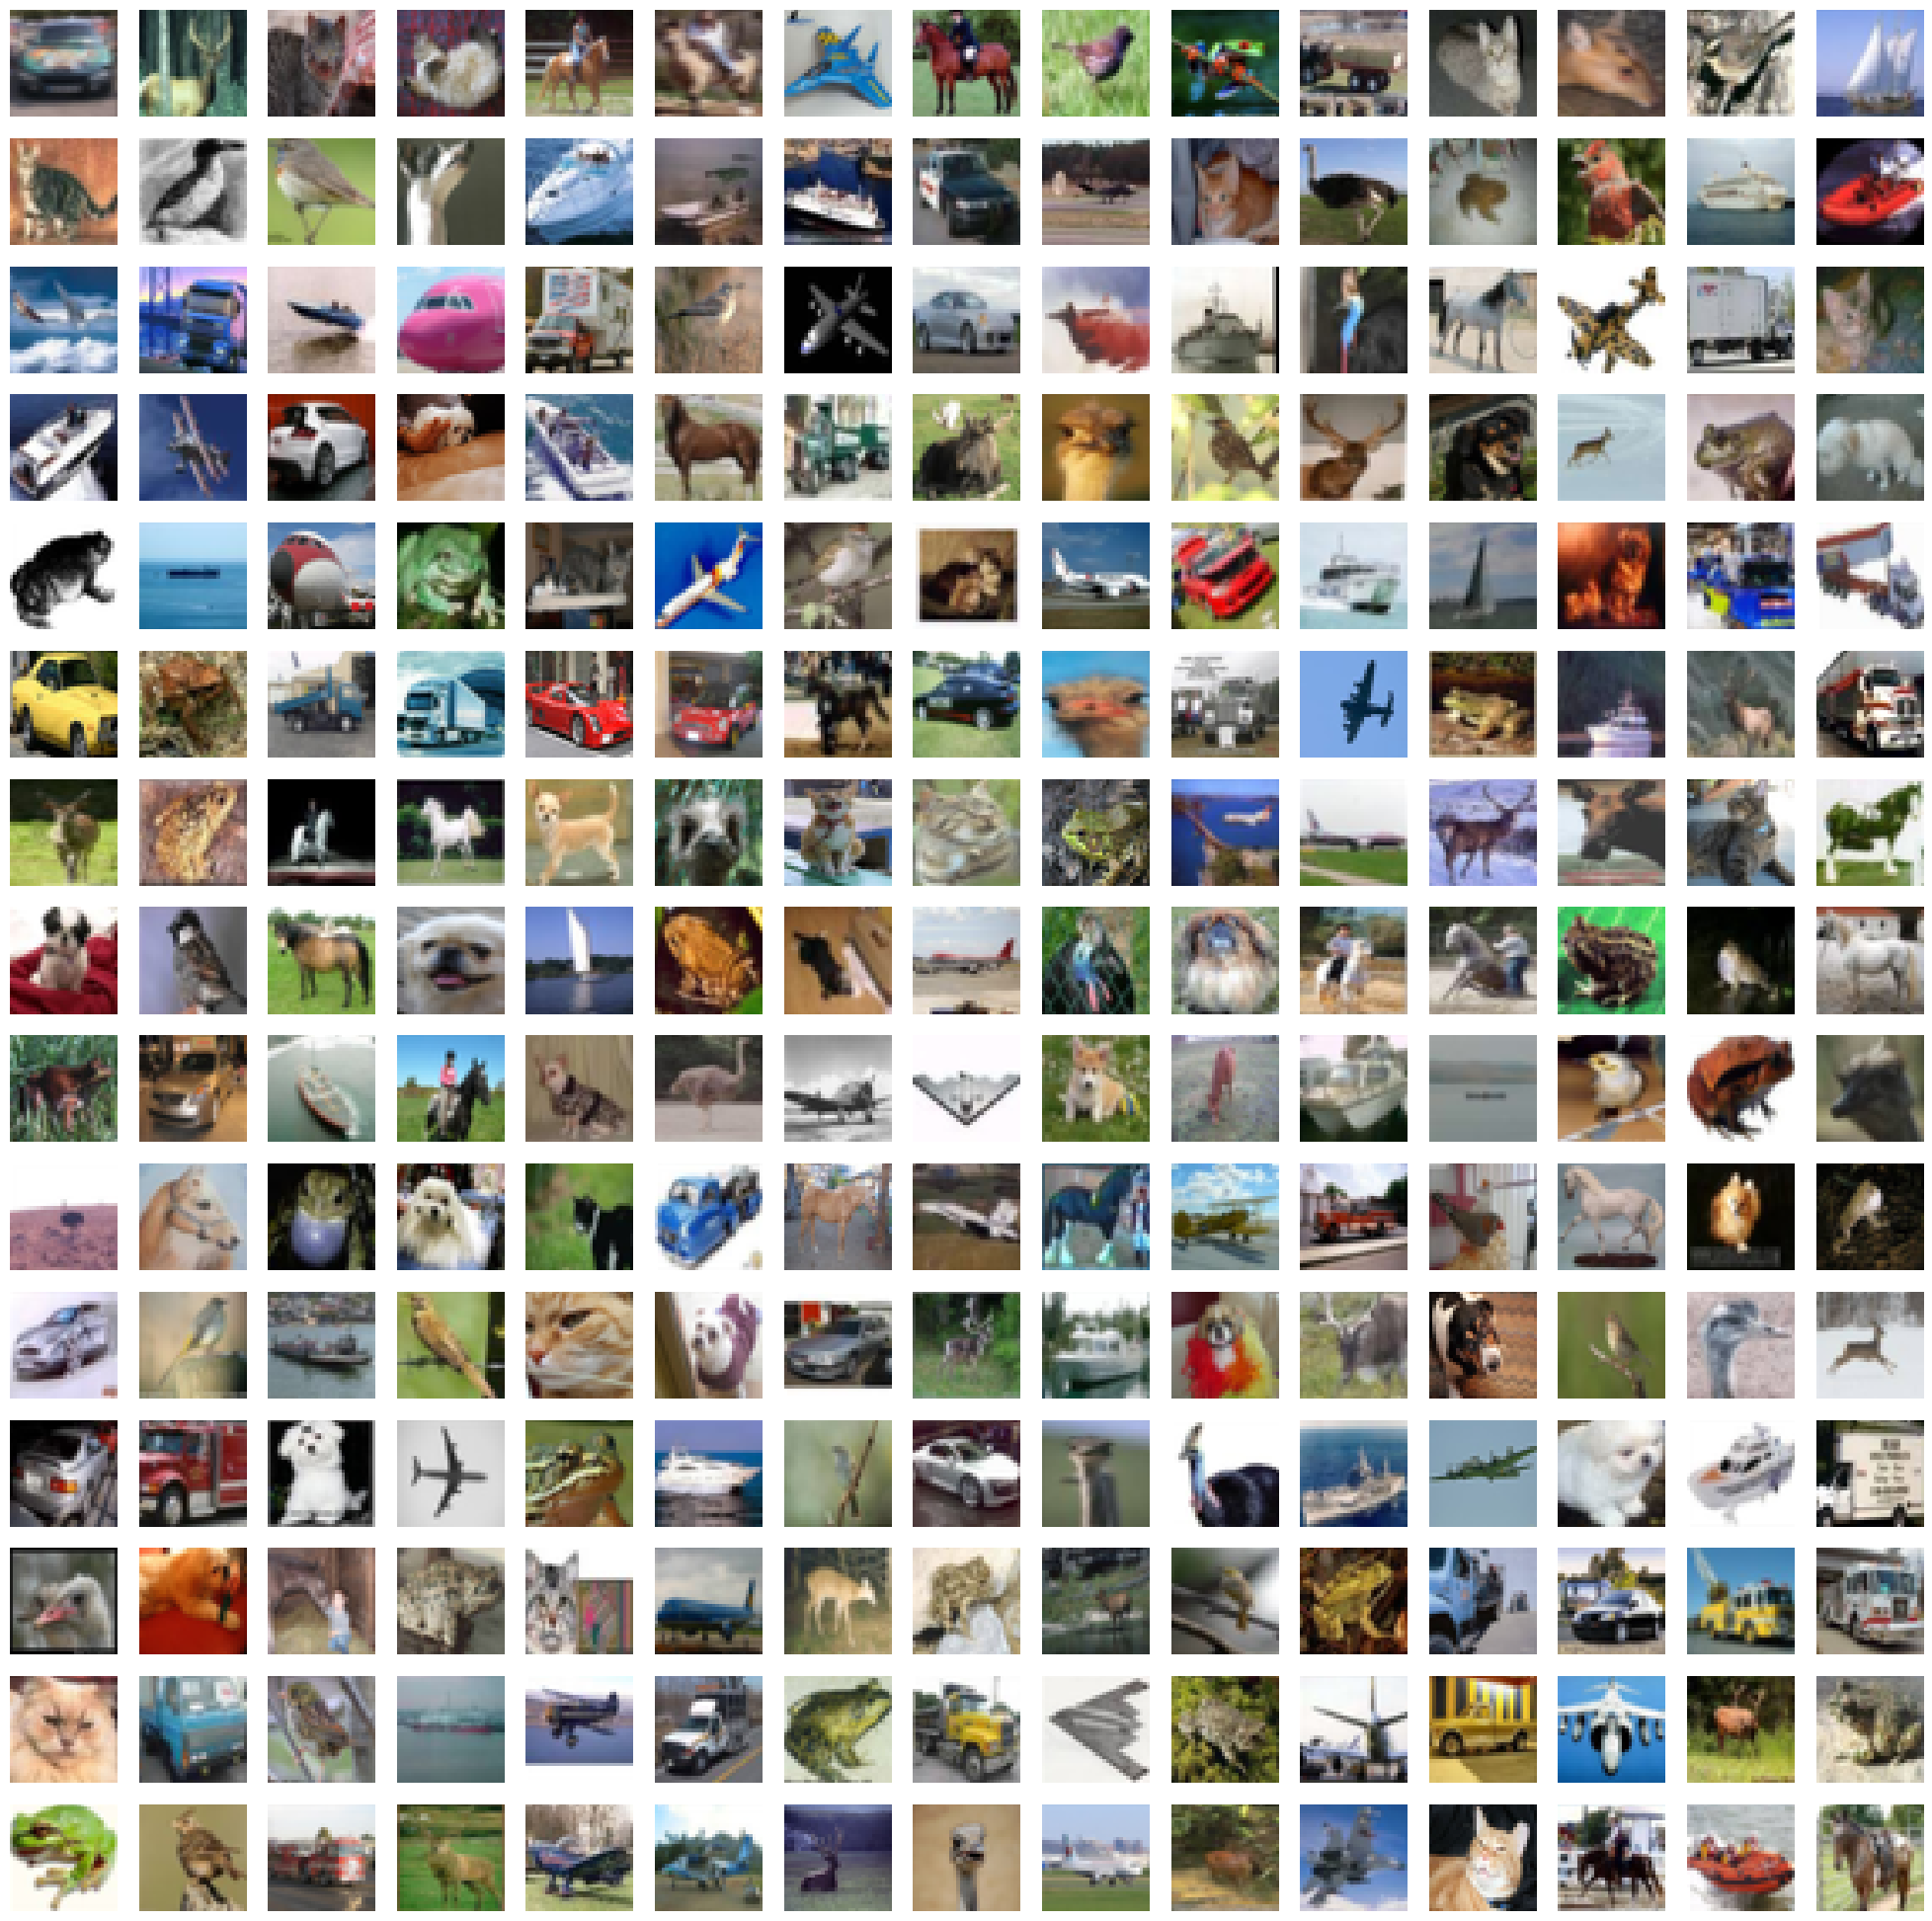

In [7]:
W_grid = 15
L_grid = 15
fig, axes = plt.subplots(L_grid, W_grid, figsize=(25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].axis('off')


#Basic CNN model with F1 score


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report
from keras.datasets import cifar10
import numpy as np

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Preprocess the data
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values to be between 0 and 1

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),  # Dropout layer to reduce overfitting

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64,
                    validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Get predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels from one-hot encoding

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=[
    'Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck'
]))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.2516 - loss: 1.9758 - val_accuracy: 0.4836 - val_loss: 1.4192
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4615 - loss: 1.4715 - val_accuracy: 0.5458 - val_loss: 1.2832
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5172 - loss: 1.3404 - val_accuracy: 0.5983 - val_loss: 1.1461
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5565 - loss: 1.2500 - val_accuracy: 0.5997 - val_loss: 1.1171
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5798 - loss: 1.1855 - val_accuracy: 0.6406 - val_loss: 1.0200
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6046 - loss: 1.1230 - val_accuracy: 0.6649 - val_loss: 0.9584
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6219 - loss: 1.0830 - val_accuracy: 0.6819 - val_loss: 0.9245
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6259 - loss: 1.0676 - val_accuracy: 0

#Adding Optimisers

In [10]:
from sklearn.metrics import classification_report
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import SGD, Adagrad, Adadelta, RMSprop, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.datasets import cifar10

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values to be between 0 and 1

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define a function to create the CNN model
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    return model

# Define optimizers
optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "Nesterov Momentum": SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    "Adagrad": Adagrad(learning_rate=0.01),
    "Adadelta": Adadelta(learning_rate=1.0),
    "RMSProp": RMSprop(learning_rate=0.001),
    "Adam": Adam(learning_rate=0.001)
}

# Dictionary to store history and F1 score results for each optimizer
histories = {}
f1_scores = {}

# Train the model with each optimizer
for name, optimizer in optimizers.items():
    print(f"\nTraining with {name} optimizer")

    # Create a new instance of the model
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=64,
        validation_data=(X_val, y_val)
    )

    # Save the training history
    histories[name] = history

    # Evaluate the model on the test data to get F1 score
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)

    # Calculate classification report and F1 score
    report = classification_report(y_true_classes, y_pred_classes, output_dict=True)
    f1_scores[name] = report['weighted avg']['f1-score']
    print(f"{name} optimizer F1 score: {f1_scores[name]:.4f}")

# At this point, you have both the training histories and F1 scores for each optimizer



Training with SGD optimizer


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.1249 - loss: 2.2895 - val_accuracy: 0.2225 - val_loss: 2.1426
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1909 - loss: 2.1341 - val_accuracy: 0.2912 - val_loss: 1.9824
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2469 - loss: 2.0266 - val_accuracy: 0.3356 - val_loss: 1.8723
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2813 - loss: 1.9359 - val_accuracy: 0.3554 - val_loss: 1.7766
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3230 - loss: 1.8353 - val_accuracy: 0.3984 - val_loss: 1.6579
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3544 - loss: 1.7621 - val_accuracy: 0.4211 - val_loss: 1.5992
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3685 - loss: 1.7077 - val_accuracy: 0.4362 - val_loss: 1.5549
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3940 - loss: 1.6546 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1701 - loss: 2.1840 - val_accuracy: 0.3802 - val_loss: 1.7157
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3648 - loss: 1.6920 - val_accuracy: 0.5043 - val_loss: 1.3697
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4766 - loss: 1.4425 - val_accuracy: 0.5557 - val_loss: 1.2437
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5494 - loss: 1.2663 - val_accuracy: 0.6161 - val_loss: 1.0694
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5965 - loss: 1.1358 - val_accuracy: 0.6413 - val_loss: 0.9978
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6366 - loss: 1.0351 - val_accuracy: 0.6704 - val_loss: 0.9374
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6725 - loss: 0.9424 - val_accuracy: 0.6887 - val_loss: 0.8888
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6963 - loss: 0.8771 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1524 - loss: 2.2385 - val_accuracy: 0.2970 - val_loss: 1.9838
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2846 - loss: 1.9564 - val_accuracy: 0.3919 - val_loss: 1.6922
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3552 - loss: 1.7575 - val_accuracy: 0.4414 - val_loss: 1.5441
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4002 - loss: 1.6341 - val_accuracy: 0.4668 - val_loss: 1.4604
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4272 - loss: 1.5609 - val_accuracy: 0.4978 - val_loss: 1.3871
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4607 - loss: 1.4881 - val_accuracy: 0.5096 - val_loss: 1.3501
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4776 - loss: 1.4355 - val_accuracy: 0.5297 - val_loss: 1.3037
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5005 - loss: 1.3793 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2063 - loss: 2.1156 - val_accuracy: 0.4314 - val_loss: 1.5531
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4407 - loss: 1.5294 - val_accuracy: 0.5520 - val_loss: 1.2250
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5577 - loss: 1.2563 - val_accuracy: 0.6393 - val_loss: 1.0217
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6269 - loss: 1.0784 - val_accuracy: 0.6726 - val_loss: 0.9292
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6710 - loss: 0.9621 - val_accuracy: 0.6905 - val_loss: 0.9067
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7080 - loss: 0.8683 - val_accuracy: 0.7181 - val_loss: 0.8134
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7328 - loss: 0.7967 - val_accuracy: 0.6950 - val_loss: 0.8911
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7548 - loss: 0.7237 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2386 - loss: 2.0372 - val_accuracy: 0.5041 - val_loss: 1.3536
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4804 - loss: 1.4338 - val_accuracy: 0.5809 - val_loss: 1.1788
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5779 - loss: 1.2030 - val_accuracy: 0.6539 - val_loss: 0.9803
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6414 - loss: 1.0419 - val_accuracy: 0.6978 - val_loss: 0.8919
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6797 - loss: 0.9350 - val_accuracy: 0.6919 - val_loss: 0.9000
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7123 - loss: 0.8554 - val_accuracy: 0.7158 - val_loss: 0.8468
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7340 - loss: 0.7899 - val_accuracy: 0.7126 - val_loss: 0.8658
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7483 - loss: 0.7464 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.2293 - loss: 2.0217 - val_accuracy: 0.4834 - val_loss: 1.4039
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4728 - loss: 1.4373 - val_accuracy: 0.5790 - val_loss: 1.1533
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5649 - loss: 1.2143 - val_accuracy: 0.6315 - val_loss: 1.0074
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6251 - loss: 1.0650 - val_accuracy: 0.6463 - val_loss: 0.9841
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6627 - loss: 0.9855 - val_accuracy: 0.6536 - val_loss: 0.9842
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6899 - loss: 0.8973 - val_accuracy: 0.6916 - val_loss: 0.8706
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7140 - loss: 0.8250 - val_accuracy: 0.6991 - val_loss: 0.8612
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7383 - loss: 0.7593 - val_accuracy: 0.

#Hyperparameter Tuning for CNN Model on CIFAR-10 with Data Augmentation and Early Stopping

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import ParameterGrid, train_test_split

# Load CIFAR-10 data and preprocess
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoded format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Configure data augmentation with horizontal flipping
train_datagen = ImageDataGenerator(horizontal_flip=True)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Define a function to build the CNN model
def build_model(optimizer='adam', dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to train and evaluate the model
def train_and_evaluate(optimizer_class, dropout_rate, batch_size, epochs, learning_rate=0.001):
    # Clear session to avoid resource buildup
    K.clear_session()

    # Initialize optimizer based on class and settings
    optimizer = optimizer_class(learning_rate=learning_rate, momentum=0.9, nesterov=True) if optimizer_class == SGD else optimizer_class(learning_rate=learning_rate)

    # Build the model with current parameters
    model = build_model(optimizer=optimizer, dropout_rate=dropout_rate)

    # Configure early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model using data augmentation and validation data
    history = model.fit(
        train_generator,
        epochs=epochs,
        steps_per_epoch=len(X_train) // batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=0
    )

    # Return the final validation accuracy as the evaluation metric
    return history.history['val_accuracy'][-1]

# Define the grid of hyperparameters to search through
param_grid = {
    'optimizer_class': [SGD, Adam],  # Optimizers to test
    'dropout_rate': [0.3, 0.5],  # Dropout rates to try
    'batch_size': [32, 64],  # Batch sizes for training
    'epochs': [20],  # Maximum epochs, allowing early stopping to halt earlier if needed
    'learning_rate': [0.001]  # Learning rate setting for each optimizer
}

# Convert parameter grid into a list of parameter combinations
param_grid = list(ParameterGrid(param_grid))

# Initialize variables to track best model and parameters
best_score = 0
best_params = None

# Perform manual grid search over all parameter combinations
for params in param_grid:
    print(f"Evaluating with parameters: {params}")

    # Train model with current parameters
    score = train_and_evaluate(
        optimizer_class=params['optimizer_class'],
        dropout_rate=params['dropout_rate'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        learning_rate=params['learning_rate']
    )

    print(f"Validation Accuracy: {score}")

    # Update best score and parameters if current model performs better
    if score > best_score:
        best_score = score
        best_params = params

# Display best hyperparameters and their resulting accuracy
print("Optimal Parameters:", best_params)
print("Highest Score:", best_score)


Evaluating with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.g

Validation Accuracy: 0.6288999915122986
Evaluating with parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>}
Validation Accuracy: 0.7347999811172485
Evaluating with parameters: {'batch_size': 32, 'dropout_rate': 0.5, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Validation Accuracy: 0.6003999710083008
Evaluating with parameters: {'batch_size': 32, 'dropout_rate': 0.5, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>}
Validation Accuracy: 0.7210000157356262
Evaluating with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Validation Accuracy: 0.5882999897003174
Evaluating with parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'ker

#ResNet model with with Pre-trained Weights and Data Augmentation

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import ParameterGrid, train_test_split
import numpy as np

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data augmentation
train_datagen = ImageDataGenerator(horizontal_flip=True)

# Define a function to create the ResNet-50 model without pre-trained weights
def create_resnet50_model(optimizer='adam', dropout_rate=0.5):
    # Load ResNet50 without pre-trained weights
    base_model = ResNet50(
        include_top=False,
        weights=None,  # Initialize with random weights
        input_shape=(32, 32, 3)
    )

    # Add custom layers for CIFAR-10
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(dropout_rate)(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Custom function to train and evaluate the model with data augmentation
def train_model(optimizer_class, dropout_rate, batch_size, epochs, learning_rate=0.001):
    # Clear any existing models
    K.clear_session()

    # Create a fresh instance of the optimizer for each model run
    if optimizer_class == SGD:
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_class == Adam:
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer type")

    # Create the model
    model = create_resnet50_model(optimizer=optimizer, dropout_rate=dropout_rate)

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Define data generator for data augmentation
    train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

    # Train the model with data generator
    history = model.fit(
        train_generator,
        epochs=epochs,
        steps_per_epoch=len(X_train) // batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    # Return the final validation accuracy as the score for grid search
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Define the parameter grid for grid search
param_grid = {
    'optimizer_class': [SGD, Adam],
    'dropout_rate': [0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [20],
    'learning_rate': [0.001]
}

# Convert parameter grid to list of dictionaries for iteration
param_grid = list(ParameterGrid(param_grid))

# Perform manual grid search
best_score = 0
best_params = None
for params in param_grid:
    print(f"Testing parameters: {params}")

    # Train model with the current set of parameters
    score = train_model(
        optimizer_class=params['optimizer_class'],
        dropout_rate=params['dropout_rate'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        learning_rate=params['learning_rate']
    )

    print(f"Validation Accuracy: {score}")

    # Update best score and parameters if current model is better
    if score > best_score:
        best_score = score
        best_params = params

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 21ms/step - accuracy: 0.2369 - loss: 2.9155 - val_accuracy: 0.3674 - val_loss: 2.1014
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3674 - val_loss: 2.1014
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.3722 - loss: 2.4669 - val_accuracy: 0.4218 - val_loss: 7.3199
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4218 - val_loss: 7.3199
Validation Accuracy: 0.42179998755455017
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>}
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 23ms/step - accuracy: 0.2306 - loss: 2.9087 - val_accurac

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data augmentation configuration
train_datagen = ImageDataGenerator(horizontal_flip=True)

# Create a training generator with data augmentation
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)  # Using best batch_size

# Define the ResNet-50 model with the best configuration
def create_resnet50_model():
    # Load ResNet-50 without pre-trained weights
    base_model = ResNet50(
        include_top=False,
        weights=None,  # No pre-trained weights
        input_shape=(32, 32, 3)
    )

    # Add custom layers for CIFAR-10
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)  # Using dropout rate from best parameters
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)

    # Compile the model with the best optimizer configuration
    optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)  # Using best learning rate and optimizer
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the model with the best parameters
model = create_resnet50_model()

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model on the entire training set using the best parameters
history = model.fit(
    train_generator,
    epochs=20,  # Best number of epochs
    steps_per_epoch=len(X_train) // 32,  # Best batch size
    validation_data=(X_test, y_test),  # Evaluate directly on the test set
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Final Test Accuracy with Best Parameters:", test_accuracy)


Epoch 1/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 74s 28ms/step - accuracy: 0.2434 - loss: 2.8642 - val_accuracy: 0.2753 - val_loss: 45.3627
Epoch 2/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 978us/step - accuracy: 0.4062 - loss: 1.4910 - val_accuracy: 0.2827 - val_loss: 52.3470
Epoch 3/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.3815 - loss: 2.2366 - val_accuracy: 0.4554 - val_loss: 3.3719
Epoch 4/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4375 - loss: 1.4980 - val_accuracy: 0.4523 - val_loss: 3.0909
Epoch 5/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4306 - loss: 2.0750 - val_accuracy: 0.4124 - val_loss: 6.8163
Epoch 6/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 960us/step - accuracy: 0.5000 - loss: 1.6294 - val_accuracy: 0.4108 - val_loss: 5.9085
Epoch 7/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4402 - loss: 2.0824 - val_accuracy: 0.4107 - val_loss: 1.6393
Epoch 8/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 2s 985us/step - accuracy: 0.4375 -

#AlexNet

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import ParameterGrid, train_test_split

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data augmentation configuration
train_datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1)

# Define a function to create the AlexNet model
def create_alexnet_model(optimizer, dropout_rate):
    model = Sequential([
        Conv2D(96, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3), padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(384, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(384, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(dropout_rate),
        Dense(4096, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Custom function to train and evaluate the AlexNet model
def train_alexnet_model(optimizer_class, dropout_rate, batch_size, epochs, learning_rate=0.001):
    # Clear any existing models
    K.clear_session()

    # Create a fresh instance of the optimizer for each model run
    if optimizer_class == SGD:
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_class == Adam:
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer type")

    # Create the AlexNet model
    model = create_alexnet_model(optimizer=optimizer, dropout_rate=dropout_rate)

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Create the training generator with data augmentation
    train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

    # Train the model using the data generator
    history = model.fit(
        train_generator,
        epochs=epochs,
        steps_per_epoch=len(X_train) // batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    # Get the final validation accuracy
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Define the parameter grid for grid search
param_grid = {
    'optimizer_class': [SGD, Adam],  # Optimizer classes to test
    'dropout_rate': [0.3, 0.5],  # Dropout rates to try
    'batch_size': [32, 64],  # Batch sizes for training
    'epochs': [20],  # Maximum epochs, with early stopping to potentially end earlier
    'learning_rate': [0.001]  # Learning rate to use
}

# Convert parameter grid to list of dictionaries for iteration
param_grid = list(ParameterGrid(param_grid))

# Perform manual grid search and track results
best_score = 0
best_params = None

for params in param_grid:
    print(f"\nTesting parameters: {params}")

    # Train AlexNet model with the current set of parameters
    score = train_alexnet_model(
        optimizer_class=params['optimizer_class'],
        dropout_rate=params['dropout_rate'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        learning_rate=params['learning_rate']
    )

    print(f"Validation Accuracy: {score:.4f}")

    # Update best score and parameters if the current model is better
    if score > best_score:
        best_score = score
        best_params = params

# Print summary of best parameters and score
print("\nBest Parameters:", best_params)
print("Best Validation Accuracy:", best_score)

# Now, retrain the model on the full training set with data augmentation using the best parameters
print("\nRetraining the best model on the full training set with data augmentation...")

# Redefine early stopping for the final training run
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Create the final model with the best parameters
final_model = create_alexnet_model(
    optimizer=best_params['optimizer_class'](learning_rate=best_params['learning_rate'], momentum=0.9, nesterov=True) if best_params['optimizer_class'] == SGD else best_params['optimizer_class'](learning_rate=best_params['learning_rate']),
    dropout_rate=best_params['dropout_rate']
)

# Train the final model with the best parameters on the full training set
final_history = final_model.fit(
    train_datagen.flow(X_train, y_train, batch_size=best_params['batch_size']),
    epochs=best_params['epochs'],
    steps_per_epoch=len(X_train) // best_params['batch_size'],
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the final model on the test data
test_loss, test_accuracy = final_model.evaluate(X_test, y_test, verbose=1)
print("Final Test Accuracy with Best Parameters:", test_accuracy)



Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 23ms/step - accuracy: 0.3604 - loss: 1.8670 - val_accuracy: 0.5342 - val_loss: 1.2827
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5342 - val_loss: 1.2827
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.5415 - loss: 1.2687 - val_accuracy: 0.5404 - val_loss: 1.3148
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5404 - val_loss: 1.3148
Validation Accuracy: 0.5404

Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>}
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.3070 - loss: 2.4782 - val_accuracy: 0.23

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Combine original training and validation sets for final training
# Using full training set to retrain with best parameters
X_train_full, y_train_full = X_train, y_train

# Data augmentation configuration
train_datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1)
train_generator = train_datagen.flow(X_train_full, y_train_full, batch_size=32)  # Using batch_size from best parameters

# Define the AlexNet model with the best configuration
def create_alexnet_model():
    model = Sequential([
        Conv2D(96, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3), padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(384, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(384, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.5),  # Using dropout rate from best parameters
        Dense(4096, activation='relu'),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    # Compile the model with the best optimizer configuration
    optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)  # Using best learning rate and optimizer
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the model with the best parameters
model = create_alexnet_model()

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model on the entire training set using the best parameters
history = model.fit(
    train_generator,
    epochs=20,  # Using best number of epochs
    steps_per_epoch=len(X_train_full) // 32,  # Best batch size
    validation_data=(X_test, y_test),  # Evaluate on test set directly
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Final Test Accuracy with Best Parameters:", test_accuracy)


Epoch 1/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.3362 - loss: 2.0661 - val_accuracy: 0.4737 - val_loss: 1.4786
Epoch 2/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.5312 - loss: 1.2215 - val_accuracy: 0.4922 - val_loss: 1.4202
Epoch 3/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5212 - loss: 1.3300 - val_accuracy: 0.5419 - val_loss: 1.3062
Epoch 4/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.5625 - loss: 1.1229 - val_accuracy: 0.5473 - val_loss: 1.2967
Epoch 5/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5877 - loss: 1.1508 - val_accuracy: 0.6268 - val_loss: 1.0397
Epoch 6/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 0.8125 - loss: 0.9229 - val_accuracy: 0.6291 - val_loss: 1.0347
Epoch 7/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6456 - loss: 1.0025 - val_accuracy: 0.6283 - val_loss: 1.0709
Epoch 8/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - accuracy: 0.7812 -

#Mobilenet

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import ParameterGrid, train_test_split

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Set up data augmentation for training (with horizontal flip)
train_datagen = ImageDataGenerator(horizontal_flip=True)

# Define a function to create the MobileNet model
def create_mobilenet_model(optimizer, dropout_rate):
    # Load MobileNet with pre-trained weights, without the top layers
    base_model = tf.keras.applications.MobileNet(
        input_shape=(32, 32, 3),
        include_top=False,
        weights='imagenet',  # Using pre-trained ImageNet weights
        pooling=None
    )
    base_model.trainable = False  # Freeze the base model weights

    # Add custom layers on top of MobileNet for CIFAR-10
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(dropout_rate)(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Custom function to train and evaluate the MobileNet model
def train_mobilenet_model(optimizer_class, dropout_rate, batch_size, epochs, learning_rate=0.001):
    # Clear any existing models
    K.clear_session()

    # Create a fresh instance of the optimizer for each model run
    if optimizer_class == SGD:
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_class == Adam:
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer type")

    # Create the MobileNet model
    model = create_mobilenet_model(optimizer=optimizer, dropout_rate=dropout_rate)

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Create the training generator with data augmentation
    train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

    # Train the model using the data generator
    history = model.fit(
        train_generator,
        epochs=epochs,
        steps_per_epoch=len(X_train) // batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )

    # Get the final validation accuracy
    val_accuracy = history.history['val_accuracy'][-1]
    return model, val_accuracy  # Return both the model and validation accuracy

# Define the parameter grid for grid search
param_grid = {
    'optimizer_class': [SGD, Adam],
    'dropout_rate': [0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [20],
    'learning_rate': [0.001]
}

# Convert parameter grid to list of dictionaries for iteration
param_grid = list(ParameterGrid(param_grid))

# Perform manual grid search and track results
best_score = 0
best_params = None
best_model = None

for params in param_grid:
    print(f"\nTesting parameters: {params}")

    # Train MobileNet model with the current set of parameters
    model, score = train_mobilenet_model(
        optimizer_class=params['optimizer_class'],
        dropout_rate=params['dropout_rate'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        learning_rate=params['learning_rate']
    )

    print(f"Validation Accuracy: {score:.4f}")

    # Update best score, parameters, and model if current model is better
    if score > best_score:
        best_score = score
        best_params = params
        best_model = model  # Save the model with the best parameters

# Print summary of best parameters and score
print("\nBest Parameters:", best_params)
print("Best Validation Accuracy:", best_score)

# Now, retrain the model on the full training set with data augmentation using the best parameters
print("\nRetraining the best model on the full training set with data augmentation...")
final_model, _ = train_mobilenet_model(
    optimizer_class=best_params['optimizer_class'],
    dropout_rate=best_params['dropout_rate'],
    batch_size=best_params['batch_size'],
    epochs=best_params['epochs'],
    learning_rate=best_params['learning_rate']
)

# Evaluate the final model on the validation set
val_loss, val_accuracy = final_model.evaluate(X_val, y_val, verbose=1)
print(f"Final Validation Accuracy with Best Parameters: {val_accuracy:.4f}")



Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}


<ipython-input-2-d3a6e977eb93>:28: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNet(


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.1351 - loss: 2.2778 - val_accuracy: 0.1945 - val_loss: 2.2366
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1945 - val_loss: 2.2366
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1574 - loss: 2.2485 - val_accuracy: 0.2040 - val_loss: 2.2246
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2040 - val_loss: 2.2246
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1648 - loss: 2.2407 - val_accuracy: 0.1893 - val_loss: 2.2207
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 640us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1893 - val_loss: 2.2207
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1650 - loss: 2.2420 - val_accuracy: 0.1977 - val_loss: 2.2182
Epoch 8/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_test.shape

(10000, 1)

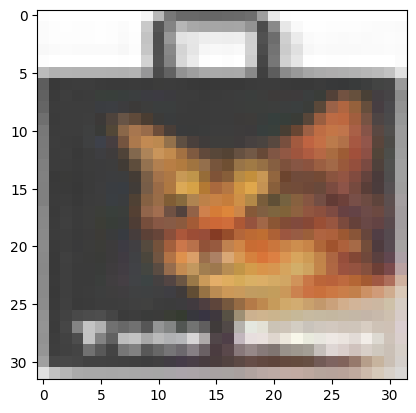

In [7]:
plt.imshow(X_train[3000])


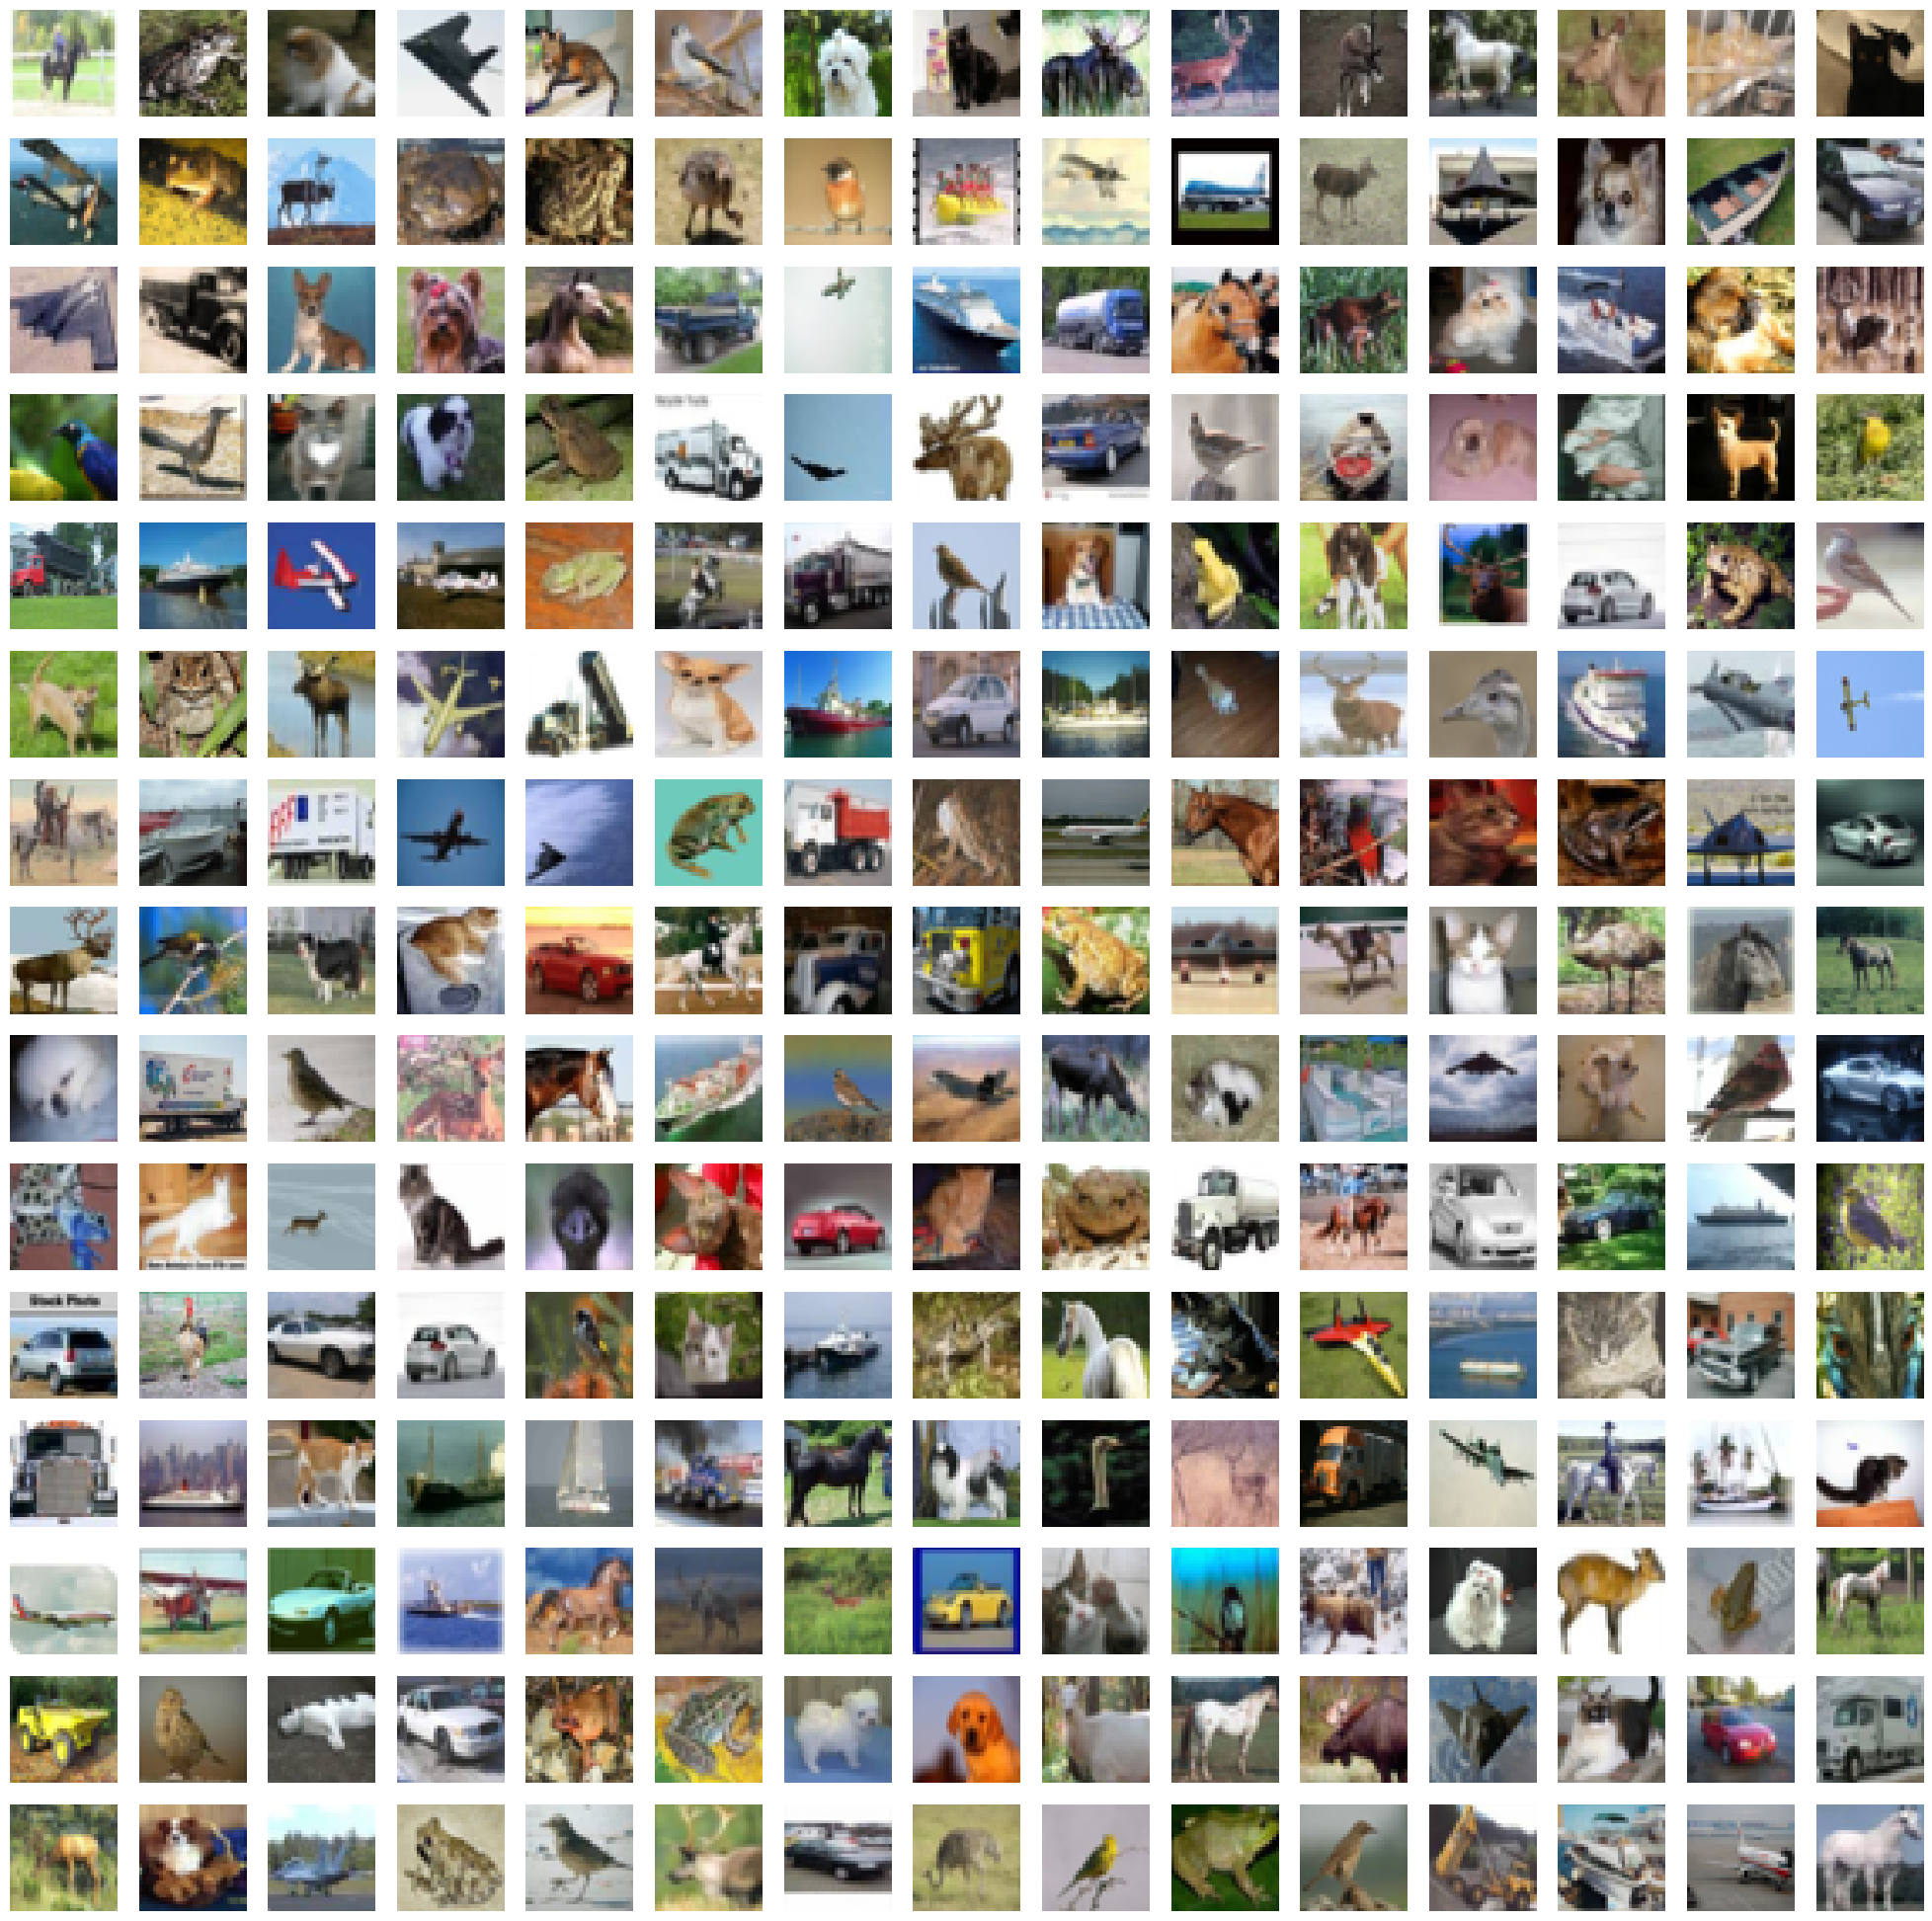

In [8]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(X_train[index])
    axes[i].axis('off')

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


model = Sequential()

# layer 1
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))

# layer 2
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))

# layer 3
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.2406 - loss: 1.9990 - val_accuracy: 0.4957 - val_loss: 1.3896
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4824 - loss: 1.4257 - val_accuracy: 0.5775 - val_loss: 1.1925
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5730 - loss: 1.2088 - val_accuracy: 0.6207 - val_loss: 1.0285
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6270 - loss: 1.0701 - val_accuracy: 0.6766 - val_loss: 0.9263
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6642 - loss: 0.9680 - val_accuracy: 0.6925 - val_loss: 0.8756
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6976 - loss: 0.8768 - val_accuracy: 0.6938 - val_loss: 0.8864
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7186 - loss: 0.8116 - val_accuracy: 0.6904 - val_loss: 0.9098
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7418 - loss: 0.7545 - val_accuracy: 0


Training with SGD optimizer
Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.1166 - loss: 2.2996 - val_accuracy: 0.1724 - val_loss: 2.2628
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1616 - loss: 2.2408 - val_accuracy: 0.2614 - val_loss: 2.0743
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2113 - loss: 2.1134 - val_accuracy: 0.2993 - val_loss: 1.9825
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2517 - loss: 2.0247 - val_accuracy: 0.3454 - val_loss: 1.8639
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2871 - loss: 1.9297 - val_accuracy: 0.3627 - val_loss: 1.7873
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3154 - loss: 1.8446 - val_accuracy: 0.3778 - val_loss: 1.7159
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3407 - loss: 1.7822 - val_accuracy: 0.4062 - val_loss: 1.6449
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3641 - lo

Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Validation Accuracy: 0.7203999757766724
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>}
Validation Accuracy: 0.7361999750137329
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.5, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Validation Accuracy: 0.6904000043869019
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.5, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>}
Validation Accuracy: 0.7315000295639038
Testing parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Validation Accuracy: 0.6581000089645386
Testing par

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import ParameterGrid, train_test_split

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Set up data augmentation for training (with horizontal flip)
train_datagen = ImageDataGenerator(horizontal_flip=True)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Define the function to create the CNN model
def create_model(optimizer='adam', dropout_rate=0.5):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dropout(dropout_rate),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Custom function to train and evaluate the model
def train_model(optimizer_class, dropout_rate, batch_size, epochs, learning_rate=0.001):
    # Clear any existing models
    K.clear_session()

    # Create a fresh instance of the optimizer for each model run
    if optimizer_class == SGD:
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_class == Adam:
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer type")

    # Create the model
    model = create_model(optimizer=optimizer, dropout_rate=dropout_rate)

    # Set up early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Train the model using the data generator
    history = model.fit(
        train_generator,
        epochs=epochs,
        steps_per_epoch=len(X_train) // batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=0
    )

    # Return the final validation accuracy as the score for grid search
    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy

# Define the parameter grid for grid search
param_grid = {
    'optimizer_class': [SGD, Adam],  # Specify optimizer classes instead of instances
    'dropout_rate': [0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [20],  # Set a higher epoch count to allow early stopping
    'learning_rate': [0.001]  # Optionally add learning rate as a hyperparameter
}

# Convert parameter grid to list of dictionaries for iteration
param_grid = list(ParameterGrid(param_grid))

# Perform manual grid search
best_score = 0
best_params = None
for params in param_grid:
    print(f"Testing parameters: {params}")

    # Train model with the current set of parameters
    score = train_model(
        optimizer_class=params['optimizer_class'],
        dropout_rate=params['dropout_rate'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        learning_rate=params['learning_rate']
    )

    print(f"Validation Accuracy: {score}")

    # Update best score and parameters if current model is better
    if score > best_score:
        best_score = score
        best_params = params

# Print the best parameters and score
print("Best Parameters:", best_params)
print("Best Score:", best_score)


Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Validation Accuracy: 0.6194999814033508
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>}
Validation Accuracy: 0.7389000058174133
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.5, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Validation Accuracy: 0.6019999980926514
Testing parameters: {'batch_size': 32, 'dropout_rate': 0.5, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>}
Validation Accuracy: 0.6880000233650208
Testing parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Validation Accuracy: 0.5641000270843506
Testing parameters: {'batch_size': 64, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.adam.Adam'>}
Validatio

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import ParameterGrid, train_test_split
import numpy as np


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


def create_resnet18_model(optimizer='adam', dropout_rate=0.5):

    base_model = tf.keras.applications.ResNet50(
        include_top=False,
        weights=None,
        input_shape=(32, 32, 3)
    )


    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(dropout_rate)(x)
    output = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=output)


    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


def train_model(optimizer_class, dropout_rate, batch_size, epochs, learning_rate=0.001):

    K.clear_session()


    if optimizer_class == SGD:
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9, nesterov=True)
    elif optimizer_class == Adam:
        optimizer = Adam(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer type")


    model = create_resnet18_model(optimizer=optimizer, dropout_rate=dropout_rate)


    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=1
    )


    val_accuracy = history.history['val_accuracy'][-1]
    return val_accuracy


param_grid = {
    'optimizer_class': [SGD, Adam],
    'dropout_rate': [0.3, 0.5],
    'batch_size': [32, 64],
    'epochs': [20],
    'learning_rate': [0.001]
}


param_grid = list(ParameterGrid(param_grid))


best_score = 0
best_params = None
for params in param_grid:
    print(f"Testing parameters: {params}")


    score = train_model(
        optimizer_class=params['optimizer_class'],
        dropout_rate=params['dropout_rate'],
        batch_size=params['batch_size'],
        epochs=params['epochs'],
        learning_rate=params['learning_rate']
    )

    print(f"Validation Accuracy: {score}")


    if score > best_score:
        best_score = score
        best_params = params

print("Best Parameters:", best_params)
print("Best Score:", best_score)


Testing parameters: {'batch_size': 32, 'dropout_rate': 0.3, 'epochs': 20, 'learning_rate': 0.001, 'optimizer_class': <class 'keras.src.optimizers.sgd.SGD'>}
Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 22ms/step - accuracy: 0.2339 - loss: 2.9555 - val_accuracy: 0.3708 - val_loss: 8.5718
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3775 - loss: 2.4043 - val_accuracy: 0.4114 - val_loss: 5.8172
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4073 - loss: 2.3053 - val_accuracy: 0.3923 - val_loss: 1.6866
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.3747 - loss: 2.3223 - val_accuracy: 0.4568 - val_loss: 2.3177
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.4393 - loss: 2.1522 - val_accuracy: 0.4736 - val_loss: 13.0944
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.4713 - loss: 1.9782 - val_accuracy: 0.4585 - val_loss: 2.2075
Validation Accuracy: 0.4584999978542328
Testing pa

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


train_datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=15, width_shift_range=0.1, height_shift_range=0.1)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)


def create_alexnet_model():
    model = Sequential([
        Conv2D(96, (3, 3), strides=(1, 1), activation='relu', input_shape=(32, 32, 3), padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Conv2D(384, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(384, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),

        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        Flatten(),
        Dense(4096, activation='relu'),
        Dropout(0.3),  # Best dropout rate
        Dense(4096, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')
    ])


    optimizer = SGD(learning_rate=0.001, momentum=0.9, nesterov=True)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model




model = create_alexnet_model()


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


history = model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=len(X_train) // 32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)


test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", test_accuracy)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.3533 - loss: 1.8911 - val_accuracy: 0.4923 - val_loss: 1.4230
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 714us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4923 - val_loss: 1.4230
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.5474 - loss: 1.2583 - val_accuracy: 0.5283 - val_loss: 1.3533
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5283 - val_loss: 1.3533
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.6016 - loss: 1.1040 - val_accuracy: 0.5984 - val_loss: 1.2073
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5984 - val_loss: 1.2073
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 27s 21ms/step - accuracy: 0.6523 - loss: 0.9649 - val_accuracy: 0.6326 - val_loss: 1.0435
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/s

#final cnn model


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

train_datagen = ImageDataGenerator(horizontal_flip=True)
train_generator = train_datagen.flow(X_train, y_train, batch_size=64)

def create_cnn_final_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Flatten(),

        Dense(256, activation='relu'),
        Dropout(0.3),

        Dense(128, activation='relu'),
        Dropout(0.3),

        Dense(10, activation='softmax')
    ])

    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

cnn_final_model = create_cnn_final_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = cnn_final_model.fit(
    train_generator,
    epochs=20,
    steps_per_epoch=len(X_train) // 64,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

test_loss, test_accuracy = cnn_final_model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2930 - loss: 1.8961 - val_accuracy: 0.5153 - val_loss: 1.3139
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 772us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5153 - val_loss: 1.3139
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5235 - loss: 1.3091 - val_accuracy: 0.6129 - val_loss: 1.0885
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6129 - val_loss: 1.0885
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6092 - loss: 1.1072 - val_accuracy: 0.6738 - val_loss: 0.9138
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6738 - val_loss: 0.9138
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6621 - loss: 0.9658 - val_accuracy: 0.7042 - val_loss: 0.8486
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.0000e+

#final mobilenet

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load and preprocess the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data augmentation
train_datagen = ImageDataGenerator(horizontal_flip=True)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Define model function
def create_mobilenet_model():
    base_model = MobileNet(include_top=False, weights=None, input_shape=(32, 32, 3))
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.3)(x)
    output = Dense(10, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    return model

# Compile and prepare model
mobilenet_model = create_mobilenet_model()
mobilenet_model.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9, nesterov=True),
                        loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model training
history = mobilenet_model.fit(train_generator, epochs=20, steps_per_epoch=len(X_train) // 32,
                              validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

# Model evaluation
test_loss, test_accuracy = mobilenet_model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.1270 - loss: 2.5917 - val_accuracy: 0.2180 - val_loss: 2.2003
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 668us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2180 - val_loss: 2.2003
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2147 - loss: 2.1542 - val_accuracy: 0.2708 - val_loss: 2.0976
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2708 - val_loss: 2.0976
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2759 - loss: 1.9709 - val_accuracy: 0.3308 - val_loss: 1.7915
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 660us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3308 - val_loss: 1.7915
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3165 - loss: 1.8532 - val_accuracy: 0.3720 - val_loss: 1.7122
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 1s 652us/step - a

#final resnet

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Load and preprocess CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Data augmentation
train_datagen = ImageDataGenerator(horizontal_flip=True, rotation_range=15,
                                   width_shift_range=0.1, height_shift_range=0.1)
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Define ResNet-18 model function
def create_resnet18_model():
    base_model = ResNet50(include_top=False, weights=None, input_shape=(32, 32, 3))
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    output = Dense(10, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize and compile model
resnet18_model = create_resnet18_model()

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train model
history = resnet18_model.fit(train_generator, epochs=20, steps_per_epoch=len(X_train) // 32,
                             validation_data=(X_val, y_val), callbacks=[early_stopping], verbose=1)

# Evaluate model
test_loss, test_accuracy = resnet18_model.evaluate(X_test, y_test, verbose=1)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 66s 27ms/step - accuracy: 0.2104 - loss: 3.3134 - val_accuracy: 0.3521 - val_loss: 1.7482
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3521 - val_loss: 1.7482
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.3253 - loss: 2.9421 - val_accuracy: 0.2497 - val_loss: 2.0809
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2497 - val_loss: 2.0809
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3435 - loss: 1.7523
Test Accuracy: 0.34310001134872437



Evaluating CNN...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step

CNN Metrics:
Accuracy: 0.746
Precision: 0.7535701397553536
Recall: 0.746
F1 Score: 0.7468296227557631
ROC AUC Score: 0.966050888888889

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      1000
           1       0.87      0.86      0.86      1000
           2       0.78      0.55      0.64      1000
           3       0.53      0.57      0.55      1000
           4       0.65      0.74      0.69      1000
           5       0.61      0.68      0.64      1000
           6       0.80      0.81      0.81      1000
           7       0.75      0.82      0.78      1000
           8       0.88      0.84      0.86      1000
           9       0.85      0.80      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



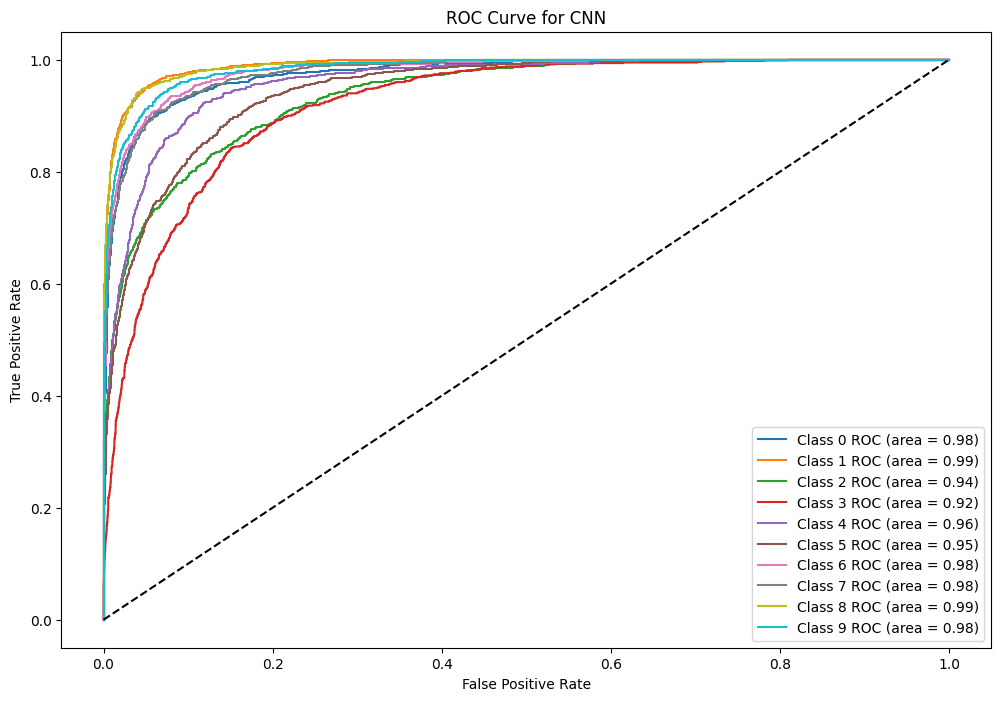


Evaluating ResNet-18...
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step

ResNet-18 Metrics:
Accuracy: 0.3431
Precision: 0.41488656952042746
Recall: 0.3431
F1 Score: 0.3248859873292052
ROC AUC Score: 0.8311157055555556

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.46      0.41      1000
           1       0.66      0.15      0.25      1000
           2       0.26      0.24      0.25      1000
           3       0.29      0.29      0.29      1000
           4       0.25      0.56      0.35      1000
           5       0.65      0.08      0.15      1000
           6       0.54      0.20      0.29      1000
           7       0.39      0.42      0.40      1000
           8       0.38      0.50      0.43      1000
           9       0.36      0.52      0.42      1000

    accuracy                           0.34     10000
   macro avg       0.41      0.34      0.32     10000
weighted avg       0.41      0.34      0.32     10000



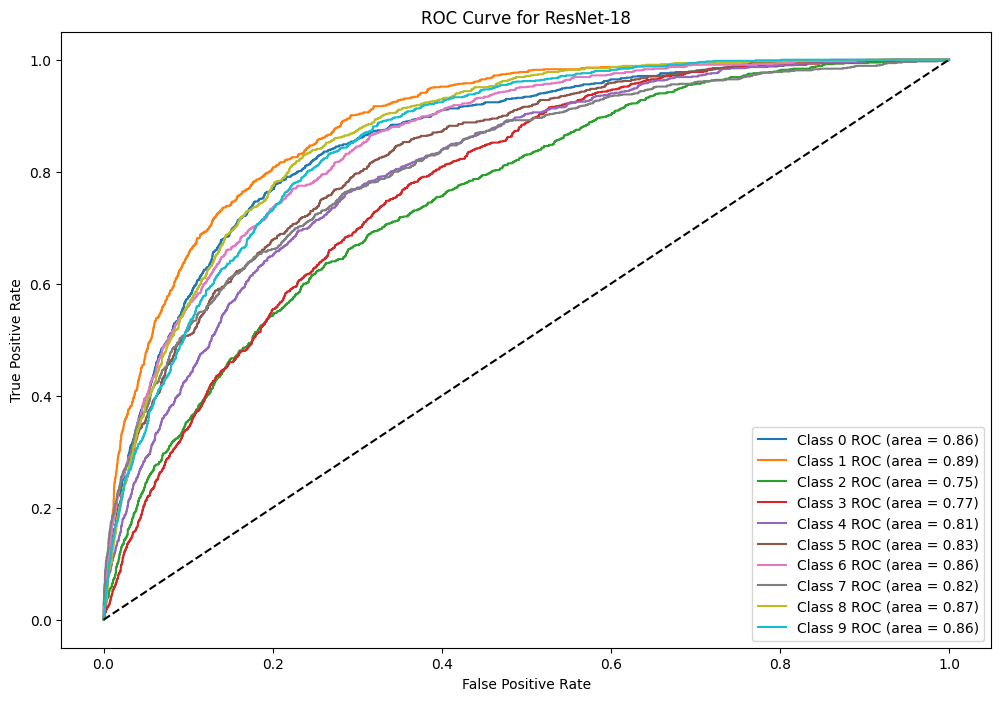


Evaluating AlexNet...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

AlexNet Metrics:
Accuracy: 0.7548
Precision: 0.7577357778975701
Recall: 0.7548
F1 Score: 0.7515851417503281
ROC AUC Score: 0.9707134666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77      1000
           1       0.89      0.83      0.86      1000
           2       0.71      0.66      0.68      1000
           3       0.66      0.52      0.58      1000
           4       0.76      0.65      0.70      1000
           5       0.70      0.65      0.67      1000
           6       0.66      0.92      0.77      1000
           7       0.83      0.79      0.81      1000
           8       0.85      0.86      0.86      1000
           9       0.73      0.90      0.81      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.76      0.75      0.75     10000



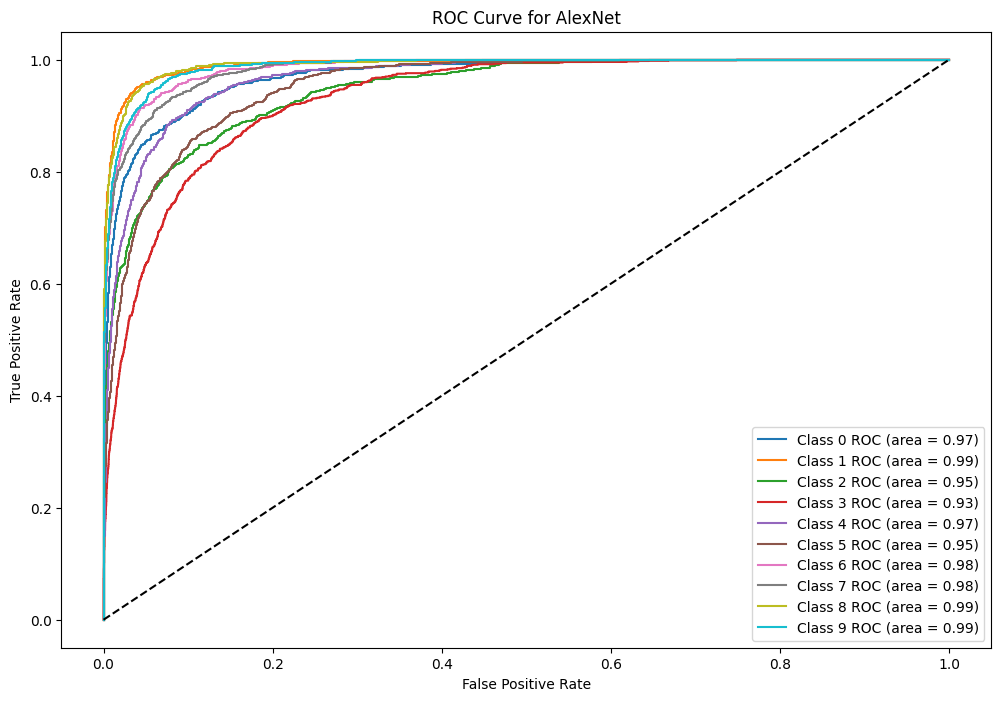


Evaluating MobileNet...
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step

MobileNet Metrics:
Accuracy: 0.4615
Precision: 0.45882034401796157
Recall: 0.4614999999999999
F1 Score: 0.45799656032843233
ROC AUC Score: 0.8712090722222223

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.53      0.53      1000
           1       0.58      0.60      0.59      1000
           2       0.33      0.30      0.31      1000
           3       0.30      0.22      0.26      1000
           4       0.36      0.33      0.35      1000
           5       0.38      0.48      0.43      1000
           6       0.45      0.55      0.50      1000
           7       0.50      0.54      0.52      1000
           8       0.61      0.55      0.58      1000
           9       0.54      0.51      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46   

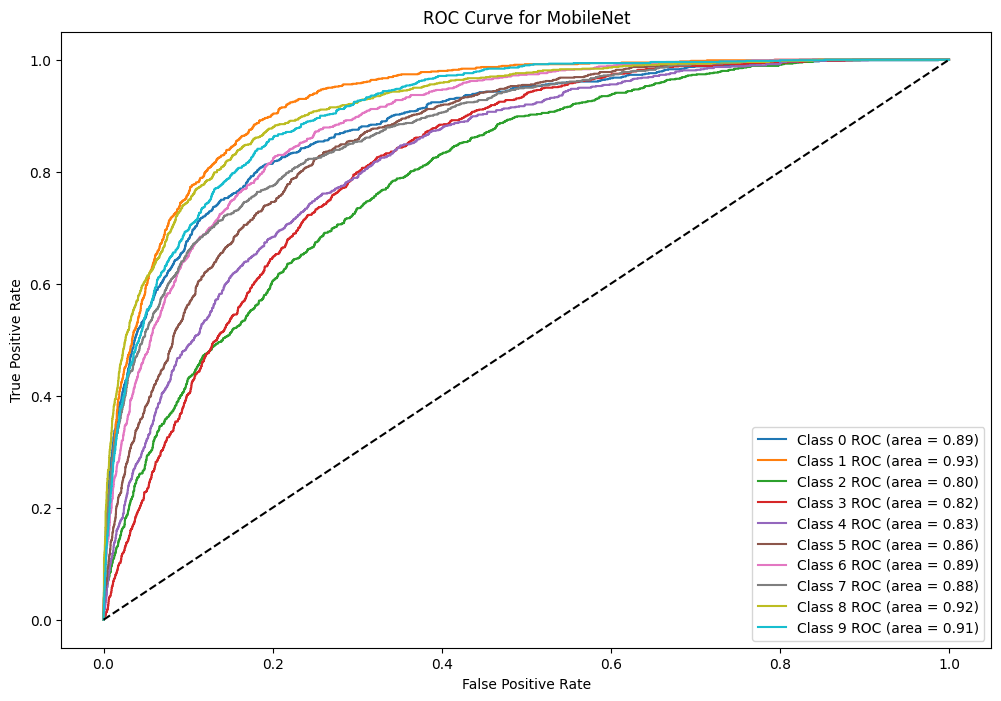

In [25]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


models = {
    "CNN": cnn_final_model,
    "ResNet-18": resnet18_model,
    "AlexNet": model,
    "MobileNet": mobilenet_model
}


y_true = np.argmax(y_test, axis=1)
y_test_bin = to_categorical(y_true, 10)


for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")


    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)


    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    classification_rep = classification_report(y_true, y_pred)
    roc_auc = roc_auc_score(y_test_bin, y_pred_probs, multi_class='ovr')


    print(f"\n{model_name} Metrics:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)
    print("\nClassification Report:\n", classification_rep)


    fig, c_ax = plt.subplots(1, 1, figsize=(12, 8))
    for i in range(10):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
        class_auc = auc(fpr, tpr)
        c_ax.plot(fpr, tpr, label=f'Class {i} ROC (area = {class_auc:.2f})')

    c_ax.plot([0, 1], [0, 1], 'k--')
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')
    c_ax.set_title(f'ROC Curve for {model_name}')
    c_ax.legend(loc="lower right")
    plt.show()



Generating confusion matrix for CNN...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


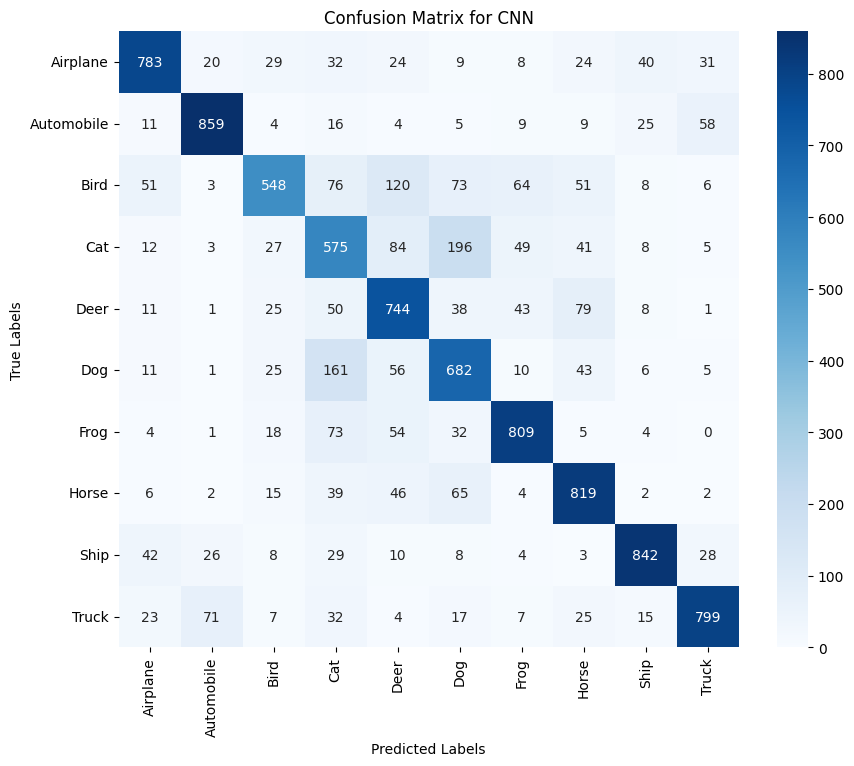


Generating confusion matrix for ResNet-18...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


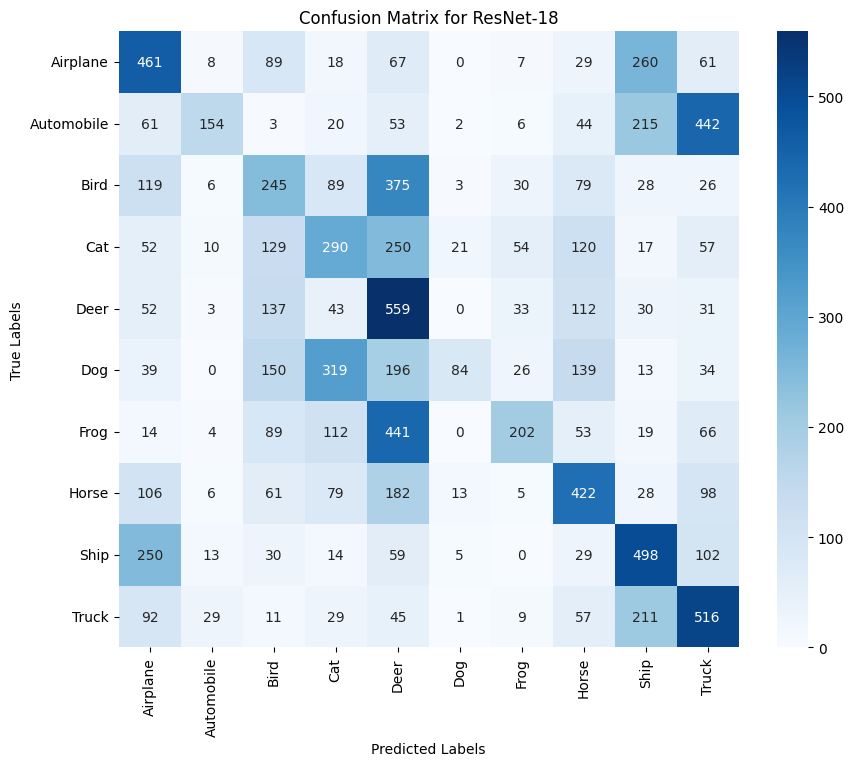


Generating confusion matrix for AlexNet...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


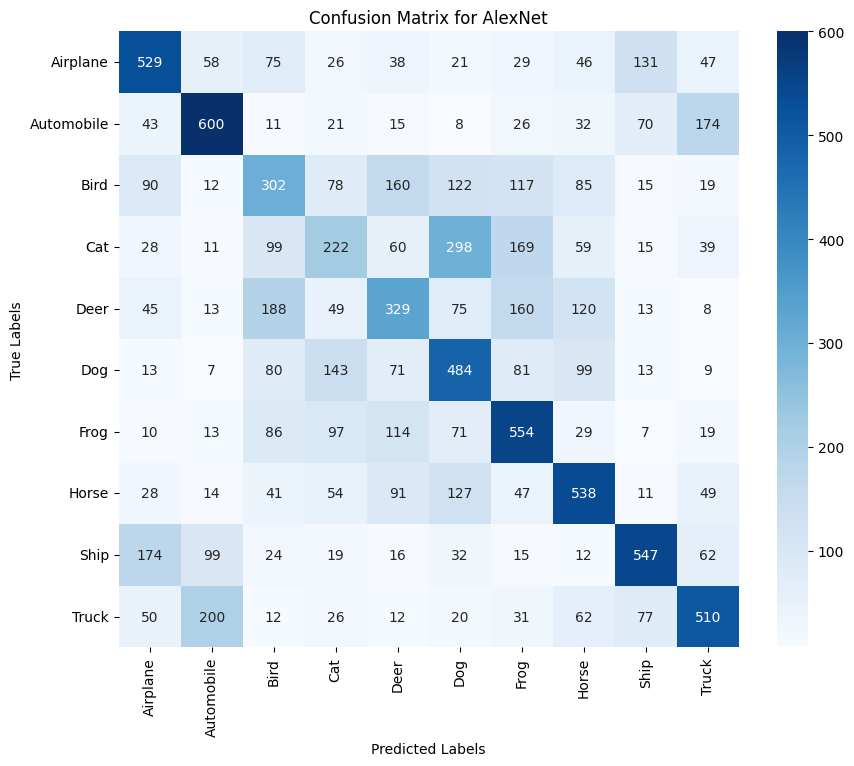


Generating confusion matrix for MobileNet...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


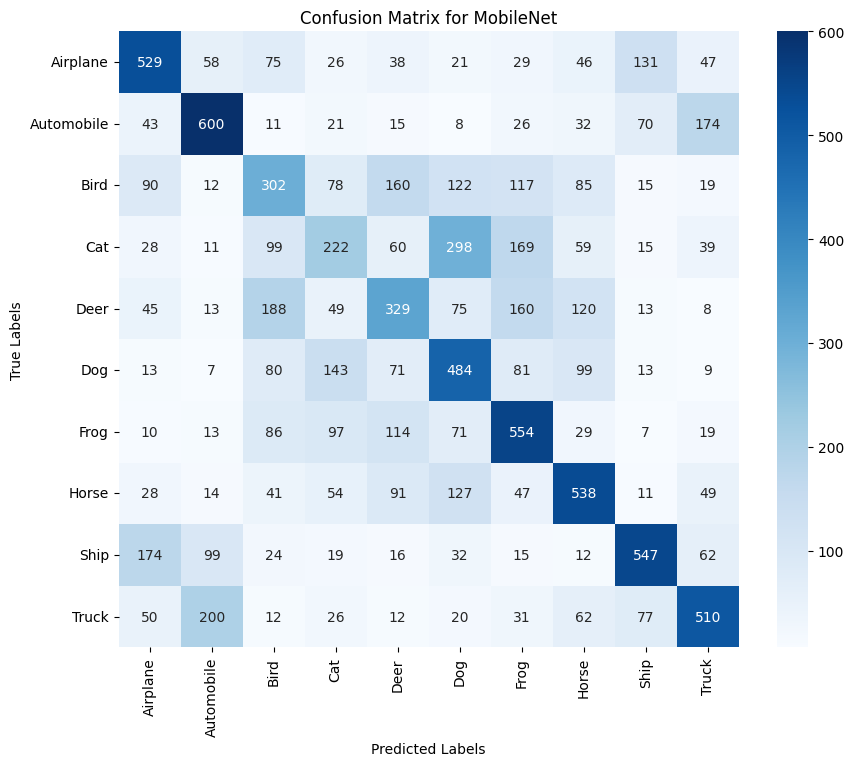

In [26]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = {
    "CNN": cnn_final_model,
    "ResNet-18": resnet18_model,
    "AlexNet": model,
    "MobileNet": mobilenet_model
}


class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]

for model_name, model in models.items():
    print(f"\nGenerating confusion matrix for {model_name}...")


    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)


    conf_matrix = confusion_matrix(y_true, y_pred)


    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()
